In [1]:
import os
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import json

from utils.dlt import *
from utils.files import FileName
from utils.skeleton_keypoints import *
from utils.motion_visualize_tool import *

In [2]:
with open("cube/subsets.json", "r") as f:
    subsets = json.load(f)

imgpoints = []
for i in ["0", "3"]:
    imgpoints.append(subsets[f"{i}.mp4"])
imgpoints = np.array(imgpoints, dtype=np.float32)

In [3]:
imgpoints[0]

array([[1586.,  892.],
       [1243.,  890.],
       [1269.,  945.],
       [1653.,  948.],
       [1593.,  729.],
       [1243.,  724.],
       [1272.,  765.],
       [1660.,  768.]], dtype=float32)

In [4]:
imgpoints[0] = [
    [1584, 888],
    [1245, 892],
    [1277, 926],
    [1660, 929],
    [1593, 716],
    [1250, 720],
    [1292, 762],
    [1670, 783],
]

In [5]:
imgpoints[0]

array([[1584.,  888.],
       [1245.,  892.],
       [1277.,  926.],
       [1660.,  929.],
       [1593.,  716.],
       [1250.,  720.],
       [1292.,  762.],
       [1670.,  783.]], dtype=float32)

In [6]:
with open("cube/3d_points.json", "r") as f:
    points = json.load(f)
cube_3d = np.array(points["object_point"], dtype=np.float32)
objpoints = np.array([cube_3d for _ in range(len(imgpoints))] , dtype=np.float32)

In [7]:
print(f"imgpoints: {imgpoints.shape}")
print(f"objpoints: {objpoints.shape}")

imgpoints: (2, 8, 2)
objpoints: (2, 8, 3)


In [8]:
cam = 2

p1 = prepare_matrix(imgpoints[0], objpoints[0])
p2 = prepare_matrix(imgpoints[1], objpoints[1])
P = np.array([p1, p2], dtype=np.float32)

cube_array = pose_recon_2c(cam, P, imgpoints)

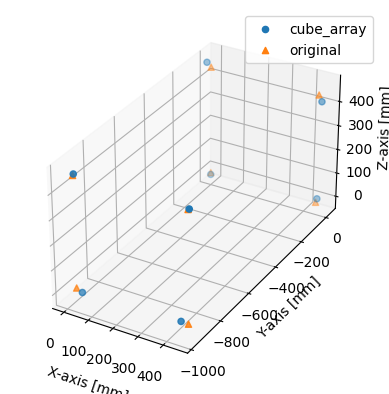

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cube_array[:, 0], cube_array[:, 1], cube_array[:, 2], marker='o', label='cube_array')
ax.scatter(cube_3d[:, 0], cube_3d[:, 1], cube_3d[:, 2], marker='^', label='original')
ax.set_xlabel('X-axis [mm]')
ax.set_ylabel('Y-axis [mm]')
ax.set_zlabel('Z-axis [mm]')
ax.legend()
ax.set_aspect('equal')
plt.show()

In [10]:
data_num = 0

camera_name1 = "0"
camera_name2 = "1"
camera_name3 = "2"
camera_name4 = "3"
camera_name5 = "4"

cam1_dir = f"data/hirasaki_{camera_name1}_{data_num}/"
cam2_dir = f"data/hirasaki_{camera_name2}_{data_num}/"
cam3_dir = f"data/hirasaki_{camera_name3}_{data_num}/"
cam4_dir = f"data/hirasaki_{camera_name4}_{data_num}/"
cam5_dir = f"data/hirasaki_{camera_name5}_{data_num}/"

cam1_position = pd.read_csv(os.path.join(cam1_dir, FileName.position_data), index_col="frame")
cam2_position = pd.read_csv(os.path.join(cam2_dir, FileName.position_data), index_col="frame")
cam3_position = pd.read_csv(os.path.join(cam3_dir, FileName.position_data), index_col="frame")
cam4_position = pd.read_csv(os.path.join(cam4_dir, FileName.position_data), index_col="frame")
cam5_position = pd.read_csv(os.path.join(cam5_dir, FileName.position_data), index_col="frame")

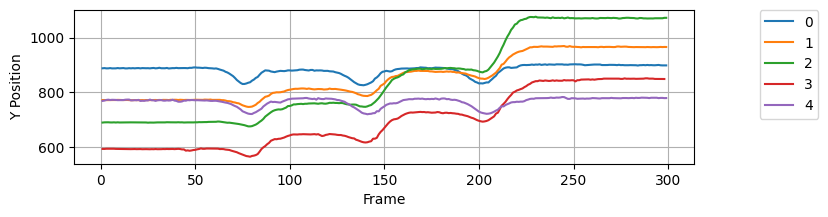

In [11]:
name = "LEFT_ANKLE"

fig, ax = plt.subplots(figsize=(8, 2))
ax.plot(cam1_position.index, cam1_position[f"{name}_y"], label=camera_name1)
ax.plot(cam2_position.index, cam2_position[f"{name}_y"], label=camera_name2)
ax.plot(cam3_position.index, cam3_position[f"{name}_y"], label=camera_name3)
ax.plot(cam4_position.index, cam4_position[f"{name}_y"], label=camera_name4)
ax.plot(cam5_position.index, cam5_position[f"{name}_y"], label=camera_name5)
ax.grid()
ax.set_xlabel('Frame')
ax.set_ylabel('Y Position')
ax.legend(bbox_to_anchor=(1.2, 1), loc='upper right', borderaxespad=0)
plt.show()

In [12]:
df_camera_sync = pd.read_csv("camera_sync.csv")

toe_off_1 = df_camera_sync["toe_off_0"].iloc[data_num]
toe_off_2 = df_camera_sync["toe_off_1"].iloc[data_num]
toe_off_3 = df_camera_sync["toe_off_2"].iloc[data_num]
toe_off_4 = df_camera_sync["toe_off_3"].iloc[data_num]
toe_off_5 = df_camera_sync["toe_off_4"].iloc[data_num]

delay_1 = toe_off_1 - toe_off_1
delay_2 = toe_off_2 - toe_off_1
delay_3 = toe_off_3 - toe_off_1
delay_4 = toe_off_4 - toe_off_1
delay_5 = toe_off_5 - toe_off_1

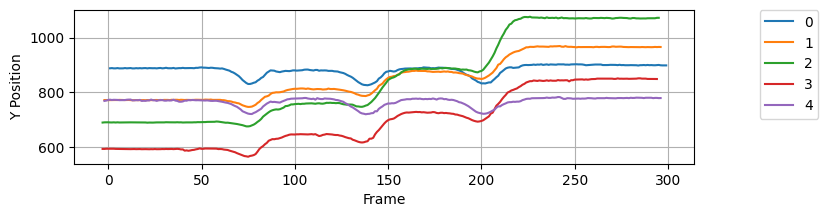

In [13]:
fig, ax = plt.subplots(figsize=(8, 2))
ax.plot(cam1_position.index - delay_1, cam1_position[f"{name}_y"], label=camera_name1)
ax.plot(cam2_position.index - delay_2, cam2_position[f"{name}_y"], label=camera_name2)
ax.plot(cam3_position.index - delay_3, cam3_position[f"{name}_y"], label=camera_name3)
ax.plot(cam4_position.index - delay_4, cam4_position[f"{name}_y"], label=camera_name4)
ax.plot(cam5_position.index - delay_5, cam5_position[f"{name}_y"], label=camera_name5)
ax.grid()
ax.set_xlabel('Frame')
ax.set_ylabel('Y Position')
ax.legend(bbox_to_anchor=(1.2, 1), loc='upper right', borderaxespad=0)
plt.show()

In [14]:
cam1_position["ID"] = cam1_position.index - delay_1
cam2_position["ID"] = cam2_position.index - delay_2
cam3_position["ID"] = cam3_position.index - delay_3
cam4_position["ID"] = cam4_position.index - delay_4
cam5_position["ID"] = cam5_position.index - delay_5

In [15]:
cam1_position = cam1_position.loc[cam1_position["ID"] > 0]
cam2_position = cam2_position.loc[cam2_position["ID"] > 0]
cam3_position = cam3_position.loc[cam3_position["ID"] > 0]
cam4_position = cam4_position.loc[cam4_position["ID"] > 0]
cam5_position = cam5_position.loc[cam5_position["ID"] > 0]

In [16]:
cam1_position.set_index("ID", inplace=True, drop=True)
cam2_position.set_index("ID", inplace=True, drop=True)
cam3_position.set_index("ID", inplace=True, drop=True)
cam4_position.set_index("ID", inplace=True, drop=True)
cam5_position.set_index("ID", inplace=True, drop=True)

In [17]:
min_frame = max(cam1_position.index.min(), cam2_position.index.min(), cam3_position.index.min(), cam4_position.index.min(), cam5_position.index.min())
max_frame = min(cam1_position.index.max(), cam2_position.index.max(), cam3_position.index.max(), cam4_position.index.max(), cam5_position.index.max())
print(min_frame, max_frame)

1.0 294.0


In [18]:
frame = min_frame
cam1_pose = cam1_position.loc[frame].values.reshape(-1, 2)
cam2_pose = cam2_position.loc[frame].values.reshape(-1, 2)
cam3_pose = cam3_position.loc[frame].values.reshape(-1, 2)
cam4_pose = cam4_position.loc[frame].values.reshape(-1, 2)
cam5_pose = cam5_position.loc[frame].values.reshape(-1, 2)
pose = np.array([cam1_pose, cam2_pose, cam3_pose, cam4_pose, cam5_pose], dtype=np.float32)
pose_result = pose_recon_2c(cam, P, pose)

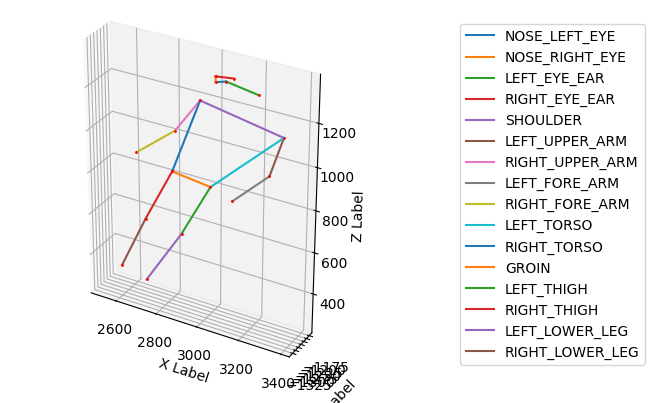

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for key, value in exp_keypoints_connections.items():
    start_idx = value[0]
    end_idx = value[1]
    ax.plot([pose_result[start_idx][0], pose_result[end_idx][0]],
            [pose_result[start_idx][1], pose_result[end_idx][1]],
            [pose_result[start_idx][2], pose_result[end_idx][2]], label=key)
for i in range(len(pose_result)):
    ax.scatter(pose_result[i][0], pose_result[i][1], pose_result[i][2], color='r', s=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
ax.set_aspect('equal')
plt.show()

In [20]:
columns = [f"{kpt}_{xyz}" for kpt in exp_keypoints_list for xyz in ["x", "y", "z"]]
position_df = pd.DataFrame(columns=columns)
position_df.index.name = 'frame'

for frame in range(int(min_frame), int(max_frame) + 1):
    cam1_pose = cam1_position.loc[frame].values.reshape(-1, 2)
    cam4_pose = cam4_position.loc[frame].values.reshape(-1, 2)
    pose = np.array([cam1_pose, cam4_pose], dtype=np.float32)
    pose_result = pose_recon_2c(cam, P, pose)
    position_df.loc[frame] = pose_result.ravel()

position_df

,NOSE_x,NOSE_y,NOSE_z,LEFT_EYE_x,LEFT_EYE_y,LEFT_EYE_z,RIGHT_EYE_x,RIGHT_EYE_y,RIGHT_EYE_z,LEFT_EAR_x,...,LEFT_KNEE_z,RIGHT_KNEE_x,RIGHT_KNEE_y,RIGHT_KNEE_z,LEFT_ANKLE_x,LEFT_ANKLE_y,LEFT_ANKLE_z,RIGHT_ANKLE_x,RIGHT_ANKLE_y,RIGHT_ANKLE_z
frame,,,,,,,,,,,,,,,,,,,,,
1,132.261725,46.568180,1574.649535,162.592213,56.814767,1607.889032,98.118790,64.844128,1608.514055,241.826301,...,478.139331,89.622251,202.682125,462.741569,257.995960,249.921747,76.412404,96.035472,243.998952,77.176711
2,132.847235,46.787056,1576.475405,163.089781,56.958771,1610.659880,97.042668,62.856111,1610.195052,243.981090,...,476.354809,87.911280,200.733265,461.989626,258.993734,250.249641,75.150151,97.089800,244.397090,75.856325
3,133.307377,46.215176,1576.311443,163.550072,56.387993,1610.495279,97.502087,62.281740,1610.028218,244.395989,...,478.397327,88.308014,199.925936,465.036593,258.770758,249.527977,77.066220,96.860400,243.656449,77.825995
4,131.423289,47.533629,1576.277360,164.450477,56.477165,1610.493125,98.390447,62.378010,1610.030308,245.370809,...,480.454746,90.707292,200.011982,465.028937,258.673279,247.305473,77.822393,98.357022,243.922718,75.478538
5,132.361571,47.275662,1576.270914,167.064449,58.365748,1610.606115,101.013770,64.322412,1610.142041,246.272427,...,482.097054,91.606052,199.693138,465.533151,260.313676,247.027692,76.534831,96.591158,244.901860,75.684308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,982.394027,-3620.895239,1510.534073,2172.678987,-3193.405611,1580.872220,193.041978,-3871.967570,1493.692768,-3504.547521,...,422.701554,228.262066,-3774.620021,436.780962,392.495916,-3769.843795,55.612905,238.778148,-3758.000901,65.085939
291,994.018683,-3615.895483,1512.011777,2079.225763,-3222.457087,1577.535043,185.615704,-3873.760213,1491.785804,-3493.630707,...,421.415456,239.805298,-3772.259092,434.222380,394.634932,-3769.452275,55.257651,249.678384,-3755.476509,64.956541
292,995.969845,-3615.760443,1512.414973,2031.779774,-3237.998228,1577.461227,142.859867,-3886.305216,1491.344303,-3488.345278,...,422.308734,237.418672,-3773.376886,435.400642,392.040645,-3769.033962,55.903335,248.149794,-3756.550746,62.953402


In [21]:
plot_3d_motion_exp(position_df/1000, output_name="test4.html")